## Анализ характеристик пород собак


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st

In [2]:
def test_shapiro(data, label, xlabel):
    tlabel = " для "+label
    print("Тест Шапиро-Уилка" + tlabel + ":")
    
    stat, p = st.shapiro(data)
    print(f'\tстат.надежность = {stat:.3f}\n\tp = {p}')
    print(f'Данные распределены {"" if p > 0.05 else "не "}нормально.')

    plt.hist(data)
    plt.title('Распределение ' + label)
    plt.xlabel(xlabel)
    plt.grid(True)

def test_spearman(a, b, label):
    tlabel = " для "+label
    print("Тест Спирмана" + tlabel + ":")
    
    stat, p = st.spearmanr(a, b)
    print(f'\tстат.надежность = {stat:.3f}\n\tp = {p}')
    
    if p > 0.05:
        print('Переменные независимы.')
    else:
        print('Переменные зависимы.')

In [7]:
def plot_hw_boxes(df: pd.DataFrame, sex: str):
    color = "blue" if sex == "male" else "red"

    for mh, Mh, mw, Mw in zip(
        df["min_height_"+sex],
        df["max_height_"+sex],
        df["min_weight_"+sex],
        df["max_weight_"+sex]
    ):
        plt.bar(
            mh, Mw-mw, bottom=mw, width=Mh-mh,
            color=color, alpha=0.2,
            align="edge",
        )
    plt.xlabel("Высота, см")
    plt.ylabel("Вес, кг")
    plt.title(f"Диапазон высота-вес, {'самцы' if sex == 'male' else 'самки'}")
    plt.grid(True)
    plt.ylim(ymin=0)
    plt.xlim(xmin=0)


def plot_h_or_w_or_life(df: pd.DataFrame, name: str, ylabel: str):
    max, min, avg = (s+"_"+name for s in ["max", "min", "avg"])
    df.sort_values(by=avg, inplace=True)

    plt.plot(df[avg].tolist(), '.', color="black")

    if name != "life":
        for i, (imax, imin) in enumerate(zip(df[max+"_male"], df[min+"_male"])):
            kwargs = {} if i != 0 else {"label": "самцы"}
            plt.bar(i, imax-imin, bottom=imin, color="blue", alpha=0.5, **kwargs)

        for i, (imax, imin) in enumerate(zip(df[max+"_female"], df[min+"_female"])):
            kwargs = {} if i != 0 else {"label": "самки"}
            plt.bar(i, imax-imin, bottom=imin, color="red", alpha=0.5, **kwargs)
    else:
        for i, (max, min) in enumerate(zip(df["max_life_expectancy"], df["min_life_expectancy"])):
            plt.bar(i, max-min, bottom=min, color="green", alpha=0.5)

    names = df.loc[:, "Name"].tolist()
    xmin, *_, xmax = names

    plt.grid(True)
    plt.ylim(ymin=0)
    if name == "height":
        plt.xticks([0, 96, 97-7], [xmin, xmax, names[-7]], rotation=90)
    elif name == "weight":
        n = 26
        plt.xticks([0, 96, n], [xmin, xmax, names[n]], rotation=90)
    else:
        plt.xticks([0, 96], [xmin, xmax], rotation=90)
    plt.ylabel(ylabel)
    if name != "life":
        plt.legend()


def plot_mean(df: pd.DataFrame, xaxis: str, yaxis: str, W=10):
    df.sort_values(by=xaxis, inplace=True)
    x = df[xaxis].tolist()
    y = df[yaxis].tolist()
    ym = np.convolve(y, np.ones(W)/W, mode='valid')

    plt.plot(x, y, '.')
    plt.plot(x[W//2:-W//2 + 1], ym)
    plt.xlabel(xaxis)
    plt.ylabel(yaxis)
    plt.grid(True)

# Описание входных данных

Строки - 97 пород собак 

Колонки - характеристики:
- №1 - название породы
- №2,3 - минимальная и максимальная продолжительности жизни, в годах
- №4,5,8,9 - мин. и макс. высота для самцов и самок, дюймы
- №6,7,10,11 - мин. и макс. вес для самцов и самок, фунты
- №12-23 - оценки различных характеристик от 0 до 5

Первым делом стоит перевести данные с системе сантиметр-килограмм:

In [4]:
df_all = pd.read_csv("Базы данных/базы данных/dog_breeds.csv")

df_all.loc[:, [
    "max_height_male",
    "min_height_male",
    "max_height_female",
    "min_height_female",
]] *= 2.54 # дюймы -> сантиметры

df_all.loc[:, [
    "max_weight_male",
    "min_weight_male",
    "max_weight_female",
    "min_weight_female",
]] *= 0.45 # фунты -> киллограммы

df_all.sort_values(by="max_height_male")

,Name,min_life_expectancy,max_life_expectancy,max_height_male,max_height_female,max_weight_male,max_weight_female,min_height_male,min_height_female,min_weight_male,...,shedding,grooming,drooling,coat_length,good_with_strangers,playfulness,protectiveness,trainability,energy,barking
12,Pomeranian,12,16,17.78,17.78,3.15,3.15,15.24,15.24,1.35,...,2,3,1,1,3,3,4,3,3,4
30,Chihuahua,14,16,20.32,20.32,2.70,2.70,12.70,12.70,1.80,...,2,1,1,2,2,4,4,3,4,5
95,Yorkshire Terrier,11,15,20.32,20.32,3.15,3.15,17.78,17.78,3.15,...,1,5,1,1,5,4,5,4,4,4
48,Pekingese,12,14,22.86,22.86,6.30,6.30,15.24,15.24,3.15,...,3,3,1,1,3,4,4,3,3,1
1,Dachshund,12,16,22.86,22.86,14.40,14.40,20.32,20.32,7.20,...,2,2,2,2,4,4,4,4,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14,Greyhound,10,13,76.20,76.20,31.50,29.25,71.12,71.12,29.25,...,2,1,1,1,3,3,3,3,4,3
37,Komondor,10,12,76.20,68.58,58.50,49.50,71.12,63.50,49.50,...,1,4,2,1,3,3,5,4,3,3
18,Great Pyrenees,10,12,81.28,81.28,54.00,40.50,68.58,68.58,49.50,...,3,2,3,1,3,3,5,3,3,3
3,Great Dane,7,10,81.28,81.28,78.75,63.00,76.20,76.20,63.00,...,3,1,4,1,3,4,5,3,4,3


Для проверки гипотез и анализа данных почти не обязательно работать с характеристиками, описывающими диапазоны.
Поэтому следующим шагом усредним данные по продолжительности жизни, высоте и весу, тем самым оперируя тремя колонками, а не десятью.

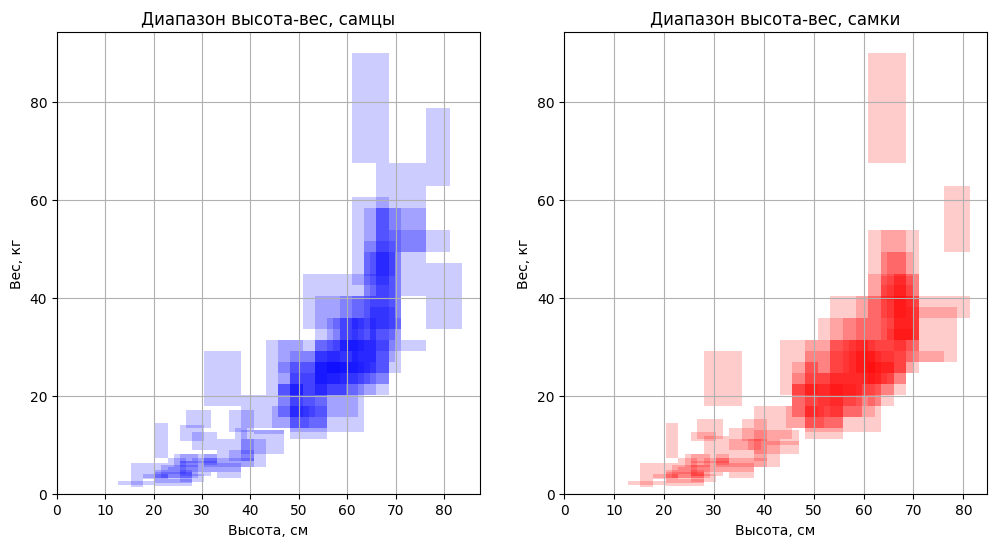

Тест Спирмана для веса и высоты:
	стат.надежность = 0.941
	p = 1.823410428590336e-46
Переменные зависимы.


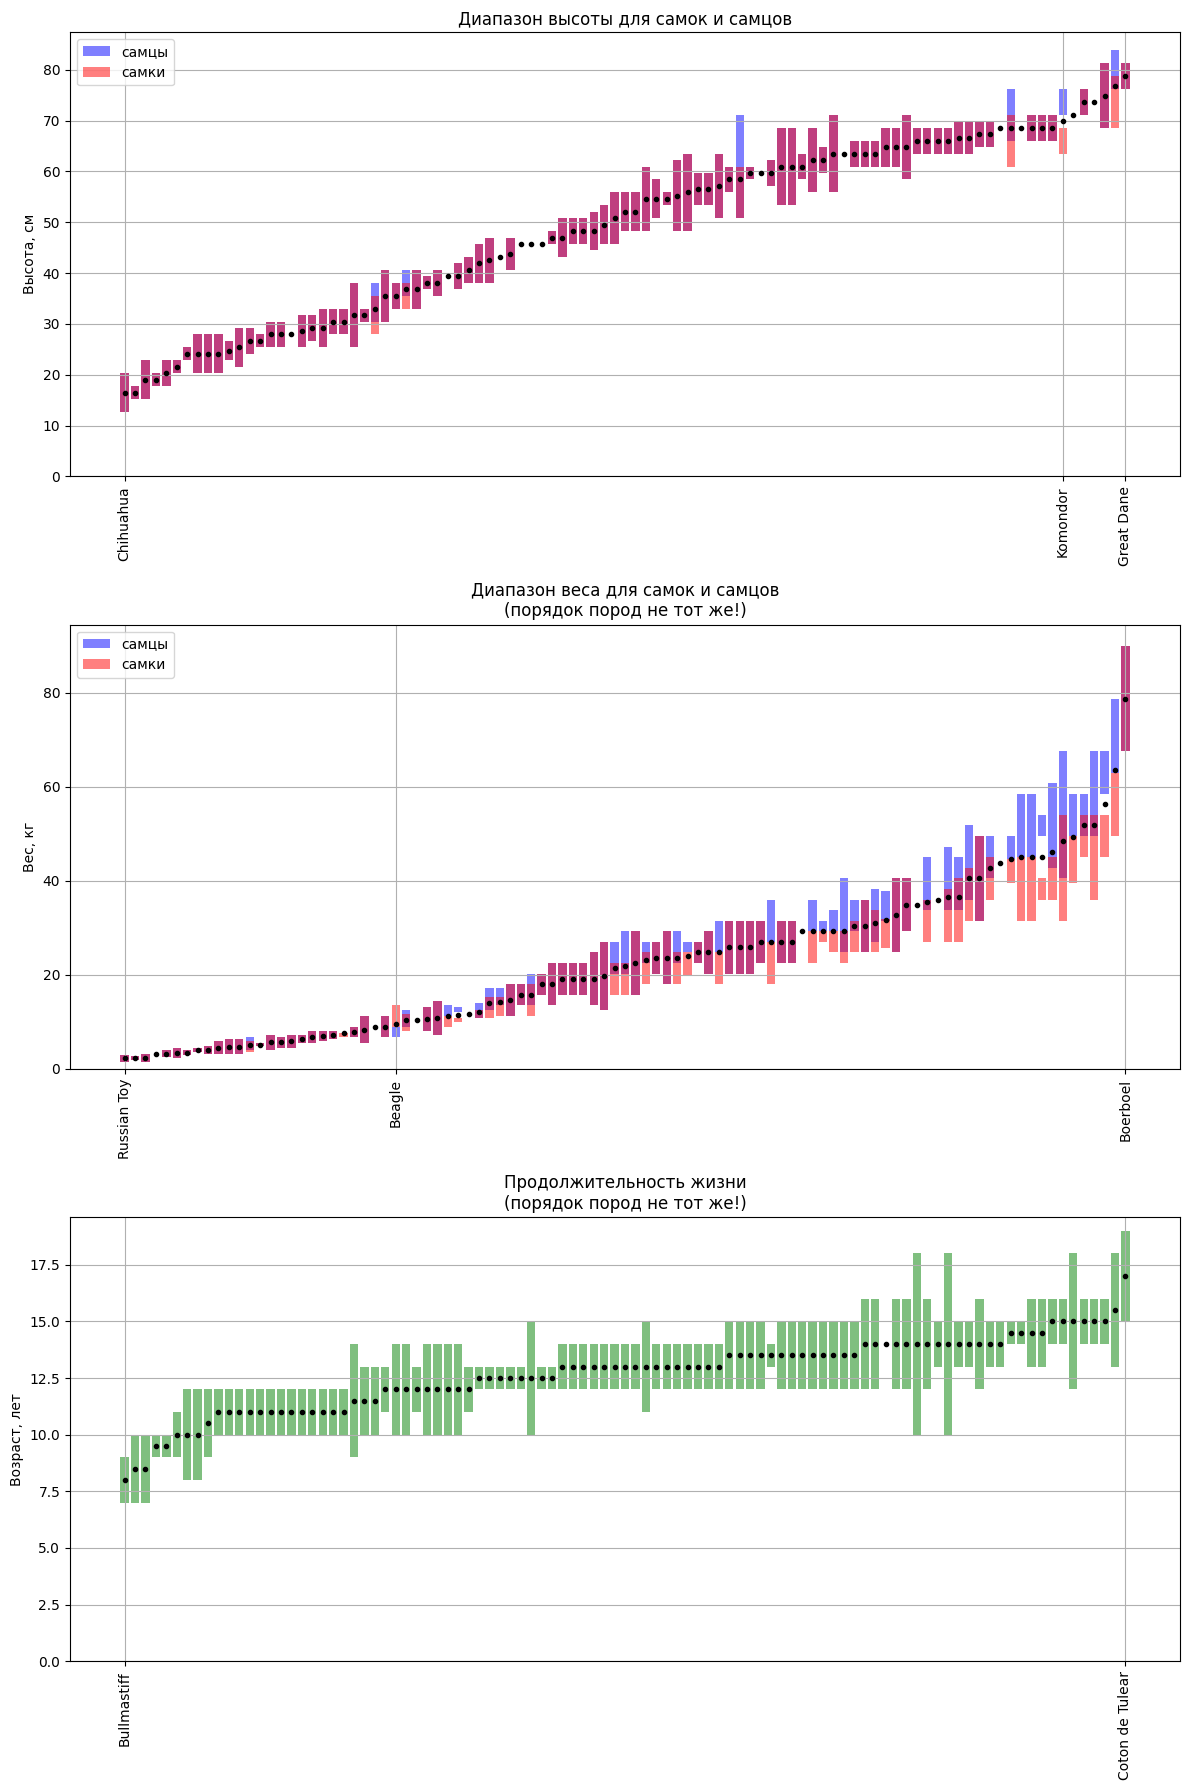

In [8]:
def plot_ranges(df_all: pd.DataFrame):
    taken_cols = [
        "max_height_male", "max_height_female",
        "min_height_male", "min_height_female",

        "max_weight_male", "max_weight_female",
        "min_weight_male", "min_weight_female",
        
        "min_life_expectancy", "max_life_expectancy",
        
        "Name",
    ]
    
    df = df_all.loc[:, taken_cols]
    
    df["avg_height"] = df.iloc[:, 0:4].sum(axis=1) / 4
    df["avg_weight"] = df.iloc[:, 4:8].sum(axis=1) / 4
    df["avg_life"]   = df.iloc[:, 8:10].sum(axis=1) / 2
    
    
    
    plt.figure(figsize=[12, 6])
    
    plt.subplot(121)
    plot_hw_boxes(df_all, "male")
    
    plt.subplot(122)
    plot_hw_boxes(df_all, "female")
    
    plt.show()
    
    test_spearman(
        df["avg_height"], df["avg_weight"],
        "веса и высоты"
    )
    
    
    
    plt.figure(figsize=[12, 6*3])
    
    plt.subplot(311)
    plot_h_or_w_or_life(df, "height", "Высота, см")
    plt.title("Диапазон высоты для самок и самцов")

    plt.subplot(312)
    plot_h_or_w_or_life(df, "weight", "Вес, кг")
    plt.title("Диапазон веса для самок и самцов\n(порядок пород не тот же!)")
    
    plt.subplot(313)
    plot_h_or_w_or_life(df, "life", "Возраст, лет")
    plt.title("Продолжительность жизни\n(порядок пород не тот же!)")

    plt.tight_layout()
    plt.show()
    
    
    
    cols = list(set(df_all.columns) - set(taken_cols))
    
    ret = df_all.loc[:, cols]
    ret["avg_height"] = df["avg_height"]
    ret["avg_weight"] = df["avg_weight"]
    ret["avg_life"] = df["avg_life"]
    ret["Name"] = df["Name"]
    return ret

df = plot_ranges(df_all)

Заметим, что между высотой собаки и ее весом наблюдается ожидаемая корреляция, подтвежденная тестом Спирмана.
Построенные графики позволяют видеть, что эта зависимость имеет предсказуемый кубический характер: *вес пропорционален кубу высоты*.
Предсказуемость заключается в том, что
$$вес = плотность\ \cdot\ объем,$$
$$высота \sim объем^{-1/3},$$
$$плотность \simeq const.$$

Интересно заметить, что диапазоны роста самок и самцов часто совпадают, однако нередко самки весят меньше, чем самый легкий самец.

На графиках показаны породы-рекордсмены, а также породы, для которых приведенные выше правила не работают.

Заметим, что, судя по третьему графику, крупная порода Бульмастиф живет меньше, чем мелкая порода Котон-де-тулеар - это можно использовать, как базу для гипотезы.

# Построение и проверка гипотез

Интересно узнать, какая из пород собак подходит для домашнего содержания.

**Гипотеза 1**
> Большие породы собак куда лучше подходят для охраны частной территории.

**Нулевая гипотеза**
> Существует корреляция между габаритами собаки и её способностью защитить частную территорию.

**Альтернативная гипотеза**
> Габариты собаки не отвечают за способность защиты своей территории.

Для начала определим, какие породы собак можно считать "большими", так как это понятие может быть довольно субъективным.
Порода будет считаться большой, если её рост будет выше определённого среднего показателя:

In [38]:
mean_height_value = df.avg_height.mean()

print(f'Средний показатель роста: {mean_height_value:.3} см')

Средний показатель роста: 49.0 см


Проверим данные роста на нормальность распределения при помощи теста Шапиро-Уилка:

Тест Шапиро-Уилка для роста породы:
	стат.надежность = 0.941
	p = 0.0002868062583729625
Данные распределены не нормально.


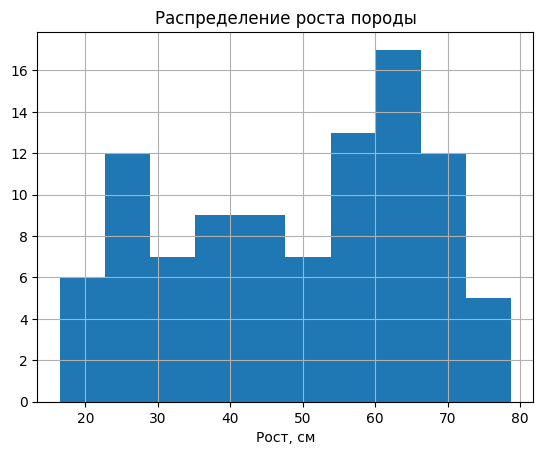

In [39]:
test_shapiro(df.avg_height, "роста породы", "Рост, см")

Тест Спирмана для роста и способности защиты:
	стат.надежность = 0.108
	p = 0.2911742020230897
Переменные независимы.


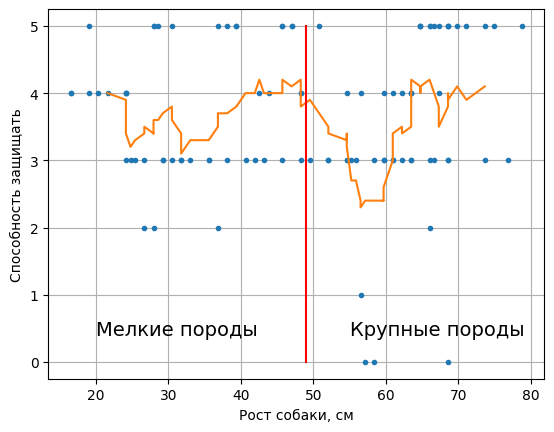

In [40]:
test_spearman(
    df.avg_height, df.protectiveness,
    "роста и способности защиты"
)

plot_mean(df, "avg_height", "protectiveness")

plt.plot(
    [mean_height_value, mean_height_value],
    [0, 5], color = 'red'
)
plt.text(20, 0.4, "Мелкие породы", fontsize=14)
plt.text(55, 0.4, "Крупные породы", fontsize=14)
plt.xlabel('Рост собаки, см')
plt.ylabel('Способность защищать')

plt.show()

Как видно из графика и теста Спирмана, взаимосвязь между габаритами и способностью охраны частной территории отсутствует - породы любого роста способны отстоять свои владения.
Однако, как показывает практика, именно крупная собака может заставить злоумышленника отказаться от идеи проникновения на частную землю.
В таком случае необходимо подобрать породы собак с большими габаритами и с показателем защиты больше 3:

In [41]:
result = df.loc[
    (df.avg_height > mean_height_value) &
    (df.protectiveness > 3)
].copy()

result.sort_values(
    by=["protectiveness", "avg_height"],
    ascending=False,
    inplace=True
)

result = result.loc[: ,[
    'Name',
    'avg_height', 'avg_weight',
    'protectiveness'
]]

print(f"Итого {len(result)} подходящих пород собак.")
result

Итого 25 подходящих пород собак.


,Name,avg_height,avg_weight,protectiveness
3,Great Dane,78.740,63.5625,5
18,Great Pyrenees,74.930,45.0000,5
61,Anatolian Shepherd Dog,73.660,51.7500,5
22,Newfoundland,71.120,56.2500,5
37,Komondor,69.850,49.2750,5
33,Akita,68.580,45.0000,5
47,Doberman Pinscher,68.580,36.5625,5
74,Tibetan Mastiff,68.580,48.3750,5
41,Giant Schnauzer,67.310,30.9375,5
68,Cane Corso,66.675,44.5500,5


**Гипотеза 2**
> Имеется взаимосвязь между продолжительностью жизни собаки и её габаритами.

**Нулевая гипотеза**
> Собаки **крупных** пород живут меньше, чем собаки мелких пород.

**Альтернативная гипотеза**
> Собаки **мелких** пород живут меньше, чем собаки крупных пород.

Проверим данные продолжительности жизни на нормальность распределения при помощи теста Шапиро-Уилка:

Тест Шапиро-Уилка для продолжительности жизни:
	стат.надежность = 0.964
	p = 0.009420237503945827
Данные распределены не нормально.


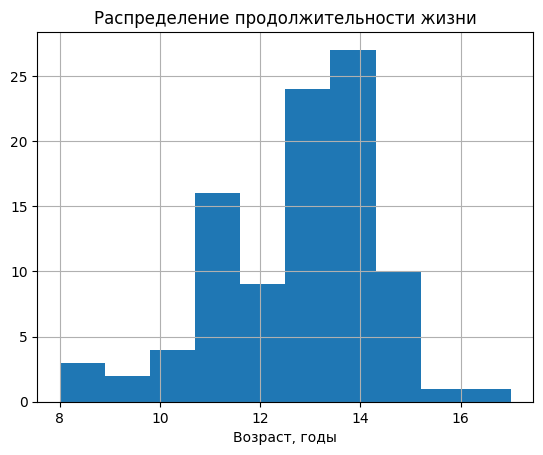

In [42]:
test_shapiro(df.avg_life, "продолжительности жизни", "Возраст, годы")

Проверим корреляцию между габаритами и продолжительности жизни при помощи теста Спирмана:

Тест Спирмана для роста и продолжительности жизни:
	стат.надежность = -0.508
	p = 1.1035098290263152e-07
Переменные зависимы.


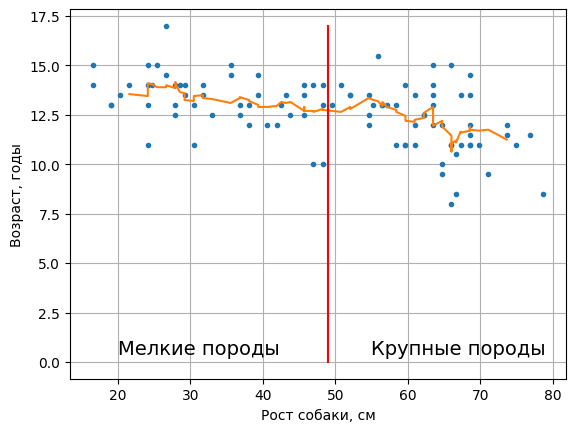

In [43]:
test_spearman(
    df.avg_height, df.avg_life,
    "роста и продолжительности жизни"
)

plot_mean(df, "avg_height", "avg_life")

plt.plot(
    [mean_height_value, mean_height_value],
    [0, df.avg_life.max()], color = 'red'
)
plt.text(20, 0.4, "Мелкие породы", fontsize=14)
plt.text(55, 0.4, "Крупные породы", fontsize=14)
plt.xlabel('Рост собаки, см')
plt.ylabel("Возраст, годы")

plt.show()

Судя по графику и по статистической надежности можно сделать вывод, что здесь наблюдается слабая обратная корреляция между габаритами собаки и её продолжительностью жизни: *чем крупнее порода, тем меньше она проживёт*.

# Анализ данных

Найдем матрицу корреляции построенной базы данных (в которой диапазоны заменены на средние значения) и построим ее тепловую диаграмму:

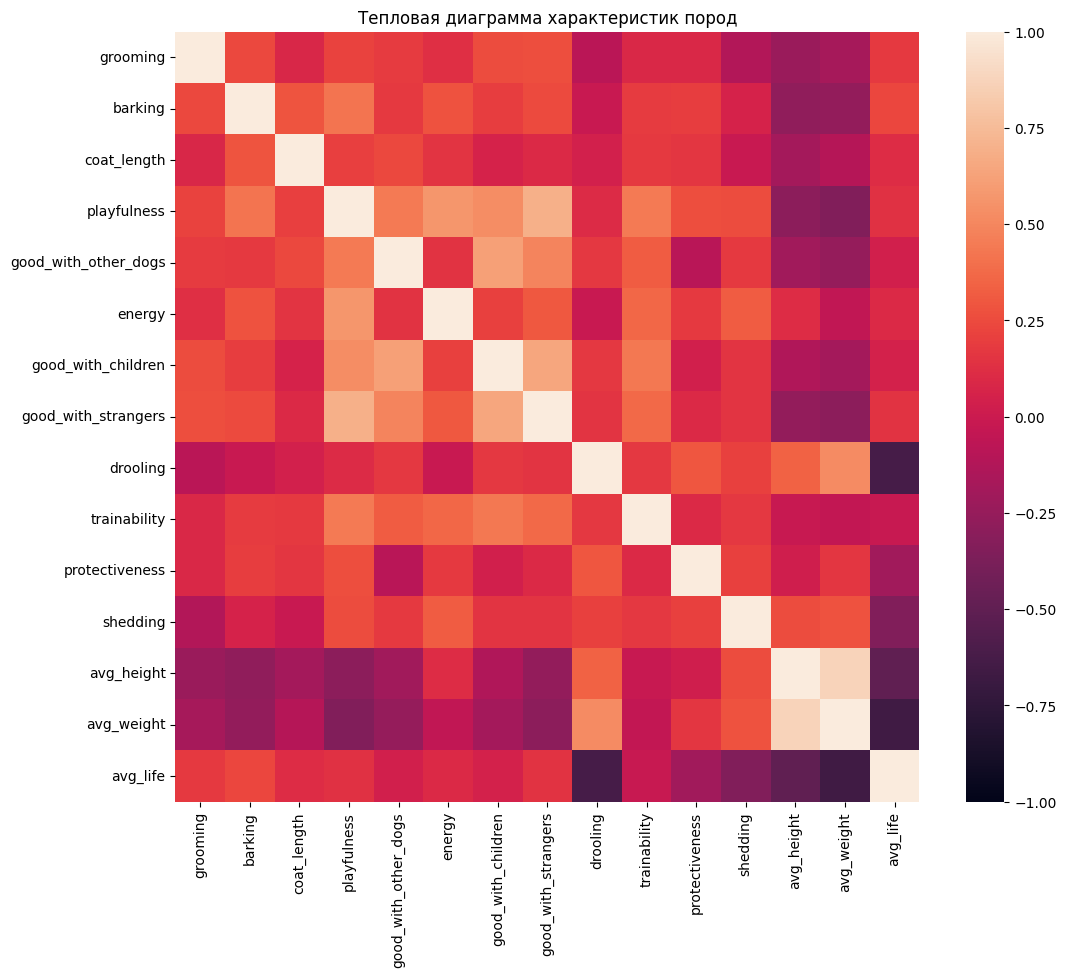

In [46]:
import seaborn as sns
if "Name" in df.columns:
    del df["Name"]

plt.figure(figsize=[12, 10])
sns.heatmap(df.corr(), vmin=-1, vmax=+1, annot=False)
plt.title("Тепловая диаграмма характеристик пород")

plt.show()

По матрице корреляции выше сразу не понятно, где искать зависимости между характеристиками.
Переставим столбцы так, чтобы диграмма стала нагляднее:

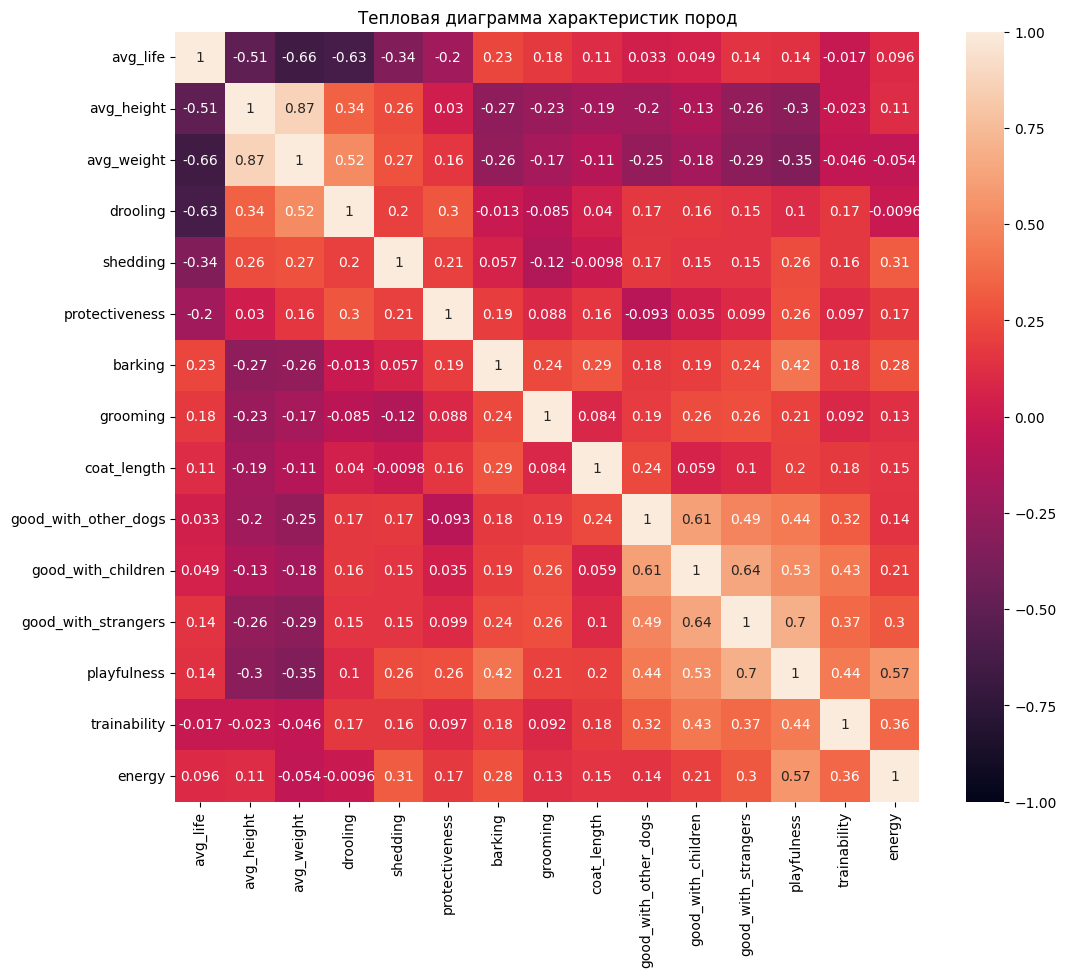

In [47]:
df = df.loc[:, [
    "avg_life", "avg_height", "avg_weight",
    'drooling', 'shedding', 'protectiveness', 'barking', 'grooming', 'coat_length',
    'good_with_other_dogs', 'good_with_children', 'good_with_strangers', 'playfulness',
    'trainability', 'energy',
]]

hmap = df.corr()
# hmap = abs(hmap) > 0.3

plt.figure(figsize=[12, 10])
sns.heatmap(hmap, vmin=-1, vmax=+1, annot=True)
plt.title("Тепловая диаграмма характеристик пород")

plt.show()

По этой же диаграмме можно заметить много интересных зависимостей:
- (***проверено***) вес пропорционален росту (= габариты породы);
- (***проверено***) продолжительность жизни падает с увеличением габаритов;
- слюнеобильность (drooling) пропорциональна весу;
- доброта к другим собакам, детям и незнакомцам, а также игривость (playfulness), хорошо скореллированы друг с другом;
- добрые породы немного легче поддаются дрессировке (trainability);
- нередко крупные породы более добрые и игривые, чем мелкие;
- большая игривость может означать много лая (barking) и энергичность (energy);
- частота и объем линьки (shedding) пропорционален габаритам и энергичности;
- крупные породы лают меньше.

Покажем характер последней зависимости:

Text(0.5, 0, 'Высота, см')

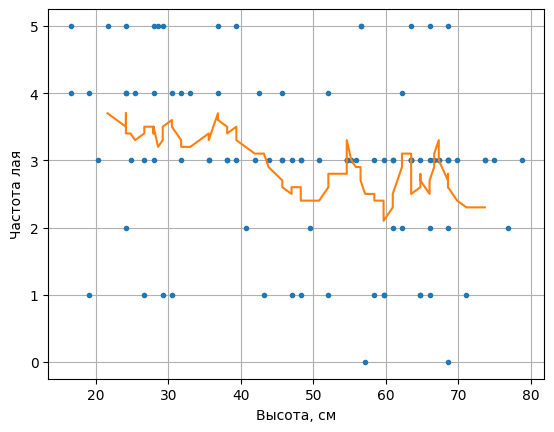

In [58]:
plot_mean(df, "avg_height", "barking")
plt.ylabel("Частота лая")
plt.xlabel("Высота, см")

# Вывод

В ходе данной работы мы пользовались статистическими методами для проверки гипотез - одна из них оказалась неверной, другая - верной.
Тщательный анализ данных позволил выявить зависимости, которые изначально не были очевидны.